In [45]:
import numpy as np 
import pandas as pd 
from sklearn import tree # decision Tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing  
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,confusion_matrix , classification_report , ConfusionMatrixDisplay
%matplotlib inline

# Read the Heart Disease Data Set

In [46]:
## Heart Disease Data from https://archive.ics.uci.edu/ml/datasets/Heart+Disease 
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age' , 'sex' , 'cp' , 'trestbps' , 'chol' , 'fbs' , 'restecg' , 
           'thalach' , 'exang' , 'oldpeak' , 'slope' , 'ca' ,'thal','num']
heart_dis_df = pd.read_csv(path, names = columns)
heart_dis_df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


In [47]:
heart_dis_df.shape

(303, 14)

In [48]:
heart_dis_df.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


14 attributes used:
1. (age) : age in years
2. (sex) : sex (1 = male; 0 = female)
3. (cp):chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic
4. (trestbps) : resting blood pressure (in mm Hg on admission to the hospital) 
5. (chol) : serum cholestoral in mg/dl
6. (fbs) : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg) : esting electrocardiographic results
* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. (thalach) :  maximum heart rate achieved
9. (exang) :  exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) :  ST depression induced by exercise relative to rest
11. (slope) : the slope of the peak exercise ST segment
* Value 1: upsloping
* Value 2: flat
* Value 3: downsloping
12. (ca) :  number of major vessels (0-3) colored by flourosopy
13. (thal) :  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (num): (the predicted attribute)

# preprocessing Data

In [49]:
# check and replace any strange character than numbers , dots , minus with NaN value 
heart_dis_df.replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=np.nan)
heart_dis_df.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [50]:
# remove nan values 
heart_dis_df.dropna(inplace= True)
heart_dis_df.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [51]:
# check the duplicated rows 
heart_dis_df.duplicated().sum()

0

In [52]:
heart_dis_df.shape

(297, 14)

In [53]:
heart_dis_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [54]:
heart_dis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [55]:
# convert all columns to numerics 
cols = heart_dis_df.columns
heart_dis_df[cols] = heart_dis_df[cols].apply(pd.to_numeric, errors='coerce')
heart_dis_df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [56]:
# convert columns have categorics to categorical columns 
categorical_col = ["sex", "cp", "fbs", "restecg", "exang", "slope","ca", "thal" , "num"]
heart_dis_df[categorical_col] = heart_dis_df[categorical_col].astype("category")
heart_dis_df.dtypes

age          float64
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
num         category
dtype: object

In [57]:
# explore different categories in each categeorical columns 
for catg_colum in categorical_col :
  number_categeories = len(heart_dis_df[catg_colum].value_counts())
  name_categeories = list(heart_dis_df[catg_colum].value_counts().index)
  print(f'number of categories in the column {catg_colum} {number_categeories} {name_categeories}')

number of categories in the column sex 2 [1.0, 0.0]
number of categories in the column cp 4 [4.0, 3.0, 2.0, 1.0]
number of categories in the column fbs 2 [0.0, 1.0]
number of categories in the column restecg 3 [0.0, 2.0, 1.0]
number of categories in the column exang 2 [0.0, 1.0]
number of categories in the column slope 3 [1.0, 2.0, 3.0]
number of categories in the column ca 4 [0.0, 1.0, 2.0, 3.0]
number of categories in the column thal 3 [3.0, 7.0, 6.0]
number of categories in the column num 5 [0, 1, 2, 3, 4]


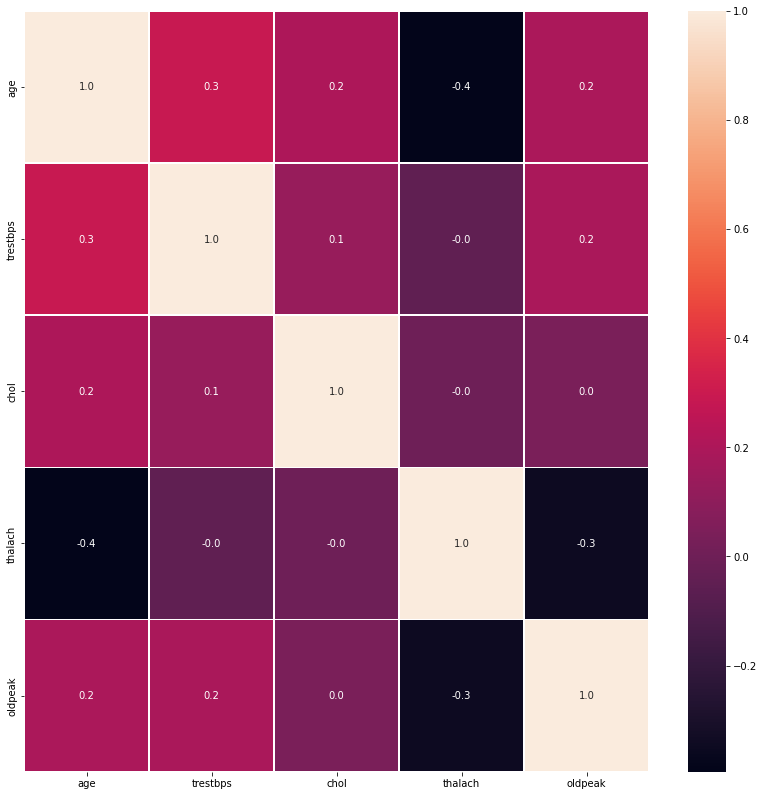

In [58]:
#correlation map between continous variabels 
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(heart_dis_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

It is clear that there is any significant coreelation between features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Number of people without HD:  160
Number of class 1 HD:  54
Number of class 2 HD:  35
Number of class 3 HD:  35
Number of class 4 HD:  13


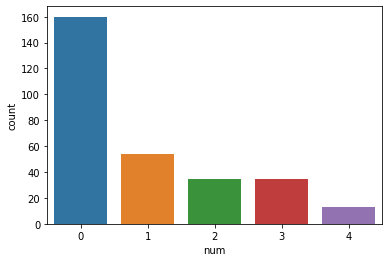

In [59]:
# Classes in the heart disease col 
ax = sns.countplot(heart_dis_df.num,label="Count");     
zero_class , one_class , two_class , three_class , four_class  = heart_dis_df.num.value_counts()
print('Number of people without HD: ',zero_class)
print('Number of class 1 HD: ',one_class)
print('Number of class 2 HD: ',two_class)
print('Number of class 3 HD: ',three_class)
print('Number of class 4 HD: ',four_class)


There are 5 classes but according to the repository of the data , they shoould be two classes

1. Value 0: < 50% diameter narrowing
2. Value 1: > 50% diameter narrowing


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


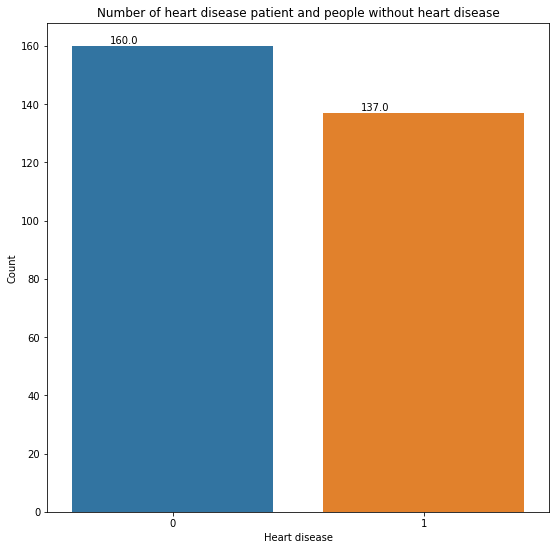

In [60]:
#convert the num calumn (heart disease ) to binary values 0 , 1 
heart_dis_df['num']= heart_dis_df.num.replace([1, 2, 3,4], 1)
plt.figure(figsize=(9,9))

ax = sns.countplot(heart_dis_df.num,label="Count" ) 
plt.ylabel('Frequency [%]')
plt.xlabel('Heart disease')
plt.ylabel('Count')
plt.title('Number of heart disease patient and people without heart disease')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


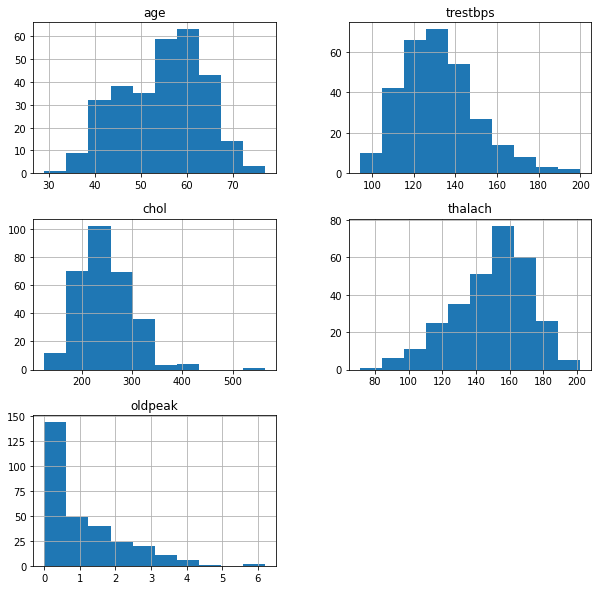

In [61]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
heart_dis_df.hist(ax=ax)
plt.show()

In [62]:
heart_dis_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [63]:
col = heart_dis_df.select_dtypes(include=['category']).columns
col

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num'], dtype='object')

In [64]:
heart_dis_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [65]:
len(heart_dis_df)

297

In [66]:
# dependent data
X = np.array(heart_dis_df.drop(['num'], axis = 1))
X = preprocessing.scale(X) # normalize data
X

array([[ 0.93618065,  0.69109474, -2.24062879, ...,  2.26414539,
        -0.72197605,  0.65587737],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         2.47842525, -0.89422007],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       ...,
       [ 1.48961547,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       [ 0.27205887,  0.69109474,  0.87388018, ...,  0.6437811 ,
         0.34482438,  1.17257652],
       [ 0.27205887, -1.44697961, -1.20245913, ...,  0.6437811 ,
         0.34482438, -0.89422007]])

In [67]:
# independant column we need to predict 
y = np.array(heart_dis_df['num'])
y[0:5]

array([0, 1, 1, 0, 0])

In [68]:
# split data to train and test set to 0.7 training  0.3 testing 
X_train,X_test, y_train,y_test = train_test_split(X, y , test_size = 0.30, random_state=1,stratify=y)

In [69]:
X_train.shape , X_test.shape

((207, 13), (90, 13))

# Building Models

# Decision tree 

In [70]:
# decision tree with default parameters and expand the tree until all leaves are pure
dt_clf = tree.DecisionTreeClassifier(random_state=0)
dt_clf = dt_clf.fit(X_train,y_train)

In [71]:
var_columns = [c for c in heart_dis_df.columns if c not in ['num']]
var_columns[0:5]

['age', 'sex', 'cp', 'trestbps', 'chol']

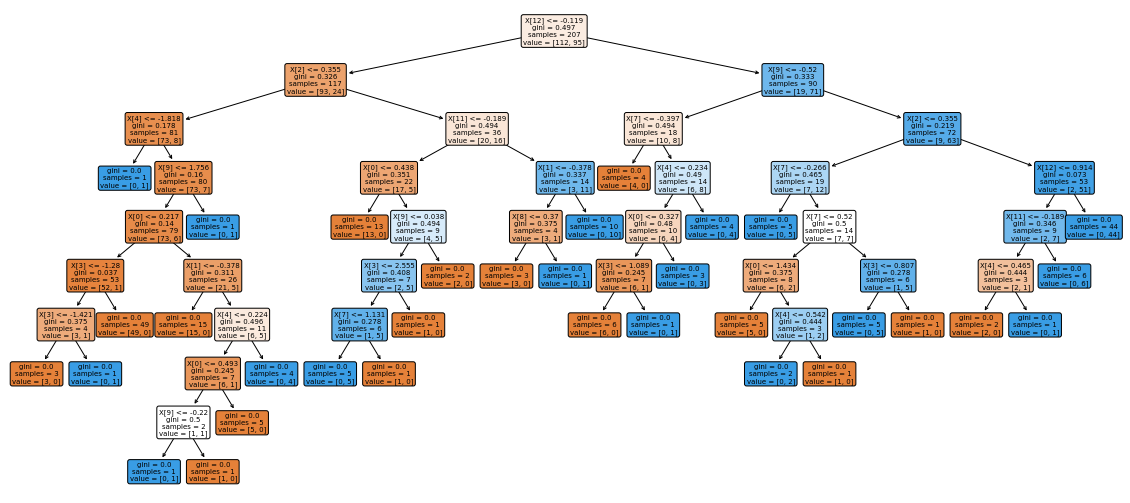

In [72]:
plt.figure(figsize = (20,9))
tree.plot_tree(dt_clf, fontsize = 7,rounded = True , filled = True);

In [73]:
# The depth of Decision tree model 
dt_clf.get_depth()

9

The depth of a decision tree is 9

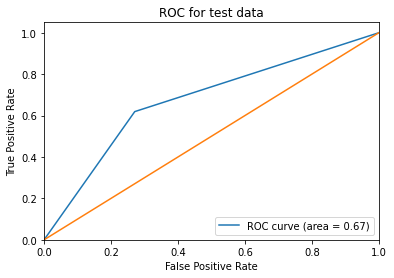

In [74]:
y_pred = dt_clf.predict(X_test) 
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for test data")
plt.legend(loc="lower right")
plt.show()

In [75]:
# evaluate the model
accuracy_deciT = metrics.accuracy_score(y_test, y_pred)
print(f'The accuracy of Desicion Tree classifier : {accuracy_deciT*100}%') 
target_names = ['class 0', 'class 1' ]
print(classification_report(y_test,y_pred, target_names=target_names))

The accuracy of Desicion Tree classifier : 67.77777777777779%
              precision    recall  f1-score   support

     class 0       0.69      0.73      0.71        48
     class 1       0.67      0.62      0.64        42

    accuracy                           0.68        90
   macro avg       0.68      0.67      0.67        90
weighted avg       0.68      0.68      0.68        90



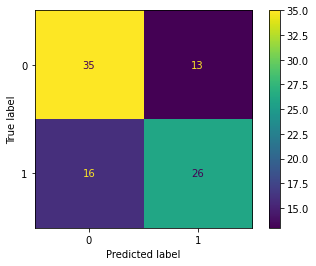

In [76]:
cm = confusion_matrix(y_test, y_pred, labels=dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_clf.classes_)
disp.plot()
plt.show()

In [77]:
# search for better max_depth for the tree
parameters = {'max_depth':range(3,20) , 'min_samples_split':range(2,10)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.7945197740112995 {'max_depth': 3, 'min_samples_split': 2}


In [79]:
# try decision tree  with the best max_depth 
dt_clf = tree.DecisionTreeClassifier(random_state=0 , max_depth = 3 , min_samples_split = 2)
dt_clf = dt_clf.fit(X_train,y_train)

In [80]:
y_pred = dt_clf.predict(X_test) 
accuracy_deciT = metrics.accuracy_score(y_test, y_pred)
print(f'The accuracy of Desicion Tree classifier without oversampling : {accuracy_deciT*100}%') 
target_names = ['class 0', 'class 1' ]
print(classification_report(y_test,y_pred, target_names=target_names))

The accuracy of Desicion Tree classifier without oversampling : 74.44444444444444%
              precision    recall  f1-score   support

     class 0       0.79      0.71      0.75        48
     class 1       0.70      0.79      0.74        42

    accuracy                           0.74        90
   macro avg       0.75      0.75      0.74        90
weighted avg       0.75      0.74      0.74        90



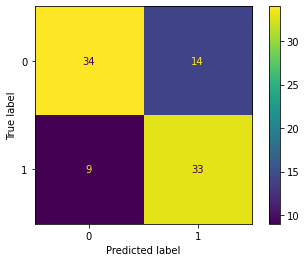

In [81]:
cm = confusion_matrix(y_test, y_pred, labels=dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt_clf.classes_)
disp.plot()

plt.show()

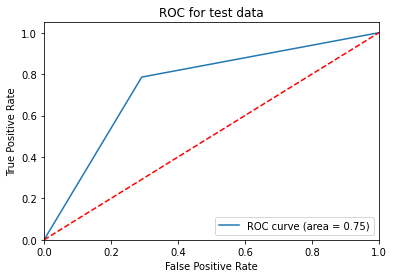

In [82]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1] , 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for test data")
plt.legend(loc="lower right")
plt.show()

# logistic Regression 

In [83]:
#logistic regression 
lr_clf = LogisticRegression(random_state=0, solver = 'liblinear')
lr_clf.fit(X_train, y_train)

#predict X_test

y_pred = lr_clf.predict(X_test)
accuracy_deciT = metrics.accuracy_score(y_test, y_pred)
print(f'The accuracy of the binary logistic regression without oversampling :  {round(accuracy_deciT*100,2)}%')
target_names = ['class 0', 'class 1']
print(classification_report(y_test,y_pred, target_names=target_names))

The accuracy of the binary logistic regression without oversampling :  84.44%
              precision    recall  f1-score   support

     class 0       0.81      0.92      0.86        48
     class 1       0.89      0.76      0.82        42

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



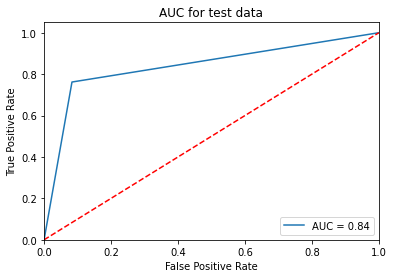

In [84]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1] , 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC for test data")
plt.legend(loc="lower right")
plt.show()

In [85]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,40), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression(solver='liblinear', random_state=0)
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters)",logreg_cv.best_params_)
print("accuracy of test data :",logreg_cv.best_score_*100)

tuned hpyerparameters :(best parameters) {'C': 0.04923882631706741, 'penalty': 'l2'}
accuracy of test data : 83.60046457607433


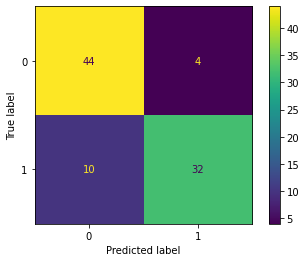

In [86]:
cm = confusion_matrix(y_test, y_pred, labels=lr_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr_clf.classes_)
disp.plot()

plt.show()

# it seems that hyperparameter tuning for logistic regression model does not improve the accuracy 